# Shark Attack Project - Team 1

-------

## Introduction

The objective of this project is to analyze the data from the shark attack dataset and answer the following questions:

1. What are the most dangerous activities that lead to shark attacks?
2. What are the most dangerous species of sharks?
3. What are the most dangerous locations for shark attacks?             
4. What are the most dangerous months for shark attacks?

## Data

The dataset used in this project is the Global Shark Attack File, which contains information about shark attacks from 1900 to 2016. The dataset has 24 columns, which are:

1. Case Number
2. Date
3. Year
(...)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import os

In [2]:
url = "https://www.sharkattackfile.net/spreadsheets/GSAF5.xls"
original_df = pd.read_excel(url)

In [3]:
# create working copy of original dataframe
df = original_df.copy()

In [4]:
# get first impression of dataset
df.head(3)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,...,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(6969, 23)

In [6]:
# clean column names
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Unnamed: 11', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [7]:
# remove whitespace behind column name for species
df = df.rename(columns = {"Species ": "Species"})

In [8]:
# choose certain variables that we are of interest for our problem statement
df = df[["Date", "Year", "Country", "Location", "Injury", "Species", "Activity"]]

In [9]:
# drop all rows where all columns are NaN
df = df.dropna(how='all')
df.shape

(6944, 7)

In [10]:
# drop all rows where 'Year' is NaN
df = df.dropna(subset = ['Year'])
df.head()


,Date,Year,Country,Location,Injury,Species,Activity
0,15 Mar 2024,2024.0,AUSTRALIA,Bargara Beach,"Minor injuries to back, abdomen and legs",Tiger shark,Swimming
1,04 Mar 2024,2024.0,USA,"Old Man's, Waikiki","No injury, shark bit surfboard",Tiger shark 8',Surfing
2,02 Mar-2024,2024.0,USA,"Rainbows, Oahu",Lacerations to left foot,3' to 4' shark,Swimming
3,25 Feb-2024,2024.0,AUSTRALIA,"Sandlnd Island, Jurian Bay",Leg bitten,Tiger shark,NaN
4,14 Feb-2024,2024.0,INDIA,"Vaitarna River, Palghar District",Calf of lower left leg injured,"Bull shark, 7'",Fishing


In [11]:
# correct the way the Years are written (for example 2023.0 to 2023) [from string to integer]
df['Year'] = df['Year'].astype(int)
df.head(3)

,Date,Year,Country,Location,Injury,Species,Activity
0,15 Mar 2024,2024,AUSTRALIA,Bargara Beach,"Minor injuries to back, abdomen and legs",Tiger shark,Swimming
1,04 Mar 2024,2024,USA,"Old Man's, Waikiki","No injury, shark bit surfboard",Tiger shark 8',Surfing
2,02 Mar-2024,2024,USA,"Rainbows, Oahu",Lacerations to left foot,3' to 4' shark,Swimming


In [12]:
# only consider last 10 years
df = df[(df['Year'] >= 2015)]

In [13]:
# check how many incidents in each year
df['Year'].value_counts()

Year
2015    143
2017    139
2016    131
2018    124
2019    114
2021    109
2023    108
2020    101
2022     98
2024     10
Name: count, dtype: int64

In [74]:
# check which countries have high incident number

df.Country.value_counts()[0:10]


Country
USA                 508
AUSTRALIA           248
BAHAMAS              43
SOUTH AFRICA         43
BRAZIL               21
NEW ZEALAND          20
NEW CALEDONIA        20
MEXICO               19
FRENCH POLYNESIA     19
EGYPT                14
Name: count, dtype: int64

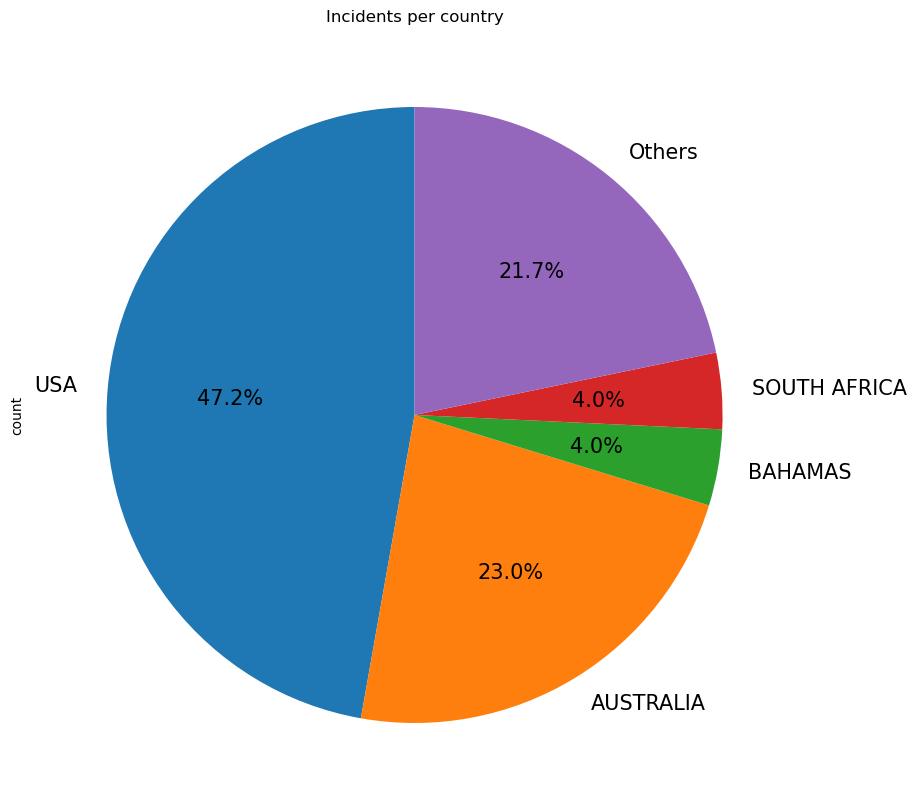

"\n\nThe lambda function lambda p: '{:.0f}'.format(p * total / 100) calculates the count by applying the percentage to the total sum and formats it as an integer. \nThis way, the pie chart will display the actual counts instead of percentages.\n\n"

In [96]:
#Make a piechart of the top 4 countries with the most incidents, and a fifth slice representing the rest

top_4 = df.Country.value_counts()[0:4]
others = df.Country.value_counts()[4:].sum()

#Make a piechart of the top 4 countries with the most incidents, and a fifth slice representing the rest

top_4 = df.Country.value_counts()[0:4]
others = df.Country.value_counts()[4:].sum()

top_4['Others'] = others

top_4.plot.pie(autopct='%1.1f%%', startangle=90, title='Incidents per country', figsize=(10,10),fontsize= 15)
plt.show()

#For future knowledge the autopct parameter is used to format the percentage of the pie chart.

"""

The lambda function lambda p: '{:.0f}'.format(p * total / 100) calculates the count by applying the percentage to the total sum and formats it as an integer. 
This way, the pie chart will display the actual counts instead of percentages.

"""


In [15]:
# check if hotspot exists
df['Location'].value_counts()[0:5]

Location
New Smyrna Beach, Volusia County    48
Cocoa Beach, Brevard  County        13
Ponce Inlet, Volusia County         11
Jacksonville Beach, Duval County     7
Melbourne Beach, Brevard County      6
Name: count, dtype: int64

In [16]:
# explore injury types
df['Injury'].value_counts()[0:10]

Injury
FATAL                       77
Foot bitten                 20
Leg bitten                  12
Lacerations to left foot     9
Minor injury to foot         9
No injury                    8
No injury, board bitten      8
Hand bitten                  7
Lacerations to foot          7
Minor injuries               7
Name: count, dtype: int64

In [17]:
df['Injury'].nunique()

752

In [18]:
# classify injury types
injury_classification = ["No Injury", "Minor", "Fatal", "Lacerations", "Bitten", "Injured", "Punctures"]
df['Injury'] = df['Injury'].apply(lambda x: "No Injury" if "no injury" in str(x).lower() else x)
df['Injury'] = df['Injury'].apply(lambda x: "No Injury" if "nor injured" in str(x).lower() else x)
df['Injury'] = df['Injury'].apply(lambda x: "Minor" if "minor" in str(x).lower() else x)
df['Injury'] = df['Injury'].apply(lambda x: "Fatal" if "fatal" in str(x).lower() else x)
df['Injury'] = df['Injury'].apply(lambda x: "Lacerations" if "laceration" in str(x).lower() else x)
df['Injury'] = df['Injury'].apply(lambda x: "Bitten" if "bitten" in str(x).lower() else x)
df['Injury'] = df['Injury'].apply(lambda x: "Bitten" if "bite" in str(x).lower() else x)
df['Injury'] = df['Injury'].apply(lambda x: "Injured" if "injured" in str(x).lower() else x)
df['Injury'] = df['Injury'].apply(lambda x: "Injured" if "injury" in str(x).lower() else x)
df['Injury'] = df['Injury'].apply(lambda x: "Injured" if "injuries" in str(x).lower() else x)
df['Injury'] = df['Injury'].apply(lambda x: "Punctures" if "puncture" in str(x).lower() else x)
df['Injury'] = df['Injury'].apply(lambda x: "Punctures" if "puncture" in str(x).lower() else x)
df['Injury'] = df['Injury'].apply(lambda x: "Others" if x not in injury_classification else x)

In [19]:
df['Injury'].value_counts()

Injury
Injured        315
Lacerations    217
Bitten         183
Minor          133
Others         100
Fatal           90
Punctures       39
Name: count, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1077 entries, 0 to 1077
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1077 non-null   object
 1   Year      1077 non-null   int64 
 2   Country   1076 non-null   object
 3   Location  1037 non-null   object
 4   Injury    1077 non-null   object
 5   Species   635 non-null    object
 6   Activity  1024 non-null   object
dtypes: int64(1), object(6)
memory usage: 67.3+ KB


In [21]:
df.isnull().sum()

Date          0
Year          0
Country       1
Location     40
Injury        0
Species     442
Activity     53
dtype: int64

In [22]:
df.Country.value_counts()

Country
USA                 508
AUSTRALIA           248
BAHAMAS              43
SOUTH AFRICA         43
BRAZIL               21
                   ... 
PORTUGAL              1
TURKS and CaICOS      1
South Africa          1
Maldives              1
ATLANTIC OCEAN        1
Name: count, Length: 66, dtype: int64

In [54]:
#Group by 'Location' and 'Country' and count the occurrences(beachs in USA and AUSTRALIA)

# Filter the DataFrame for the desired countries
filtered_countries = df[df['Country'].isin(['USA', 'AUSTRALIA'])]

# Group by 'Location' and 'Country' and count the occurrences
grouped_location = filtered_countries.groupby(['Location', 'Country']).size().unstack(fill_value=0)

# Get the sum of occurrences in each country
sum_usa = grouped_location['USA'].sum()
sum_australia = grouped_location['AUSTRALIA'].sum()

print(f"Total occurrences in USA: {sum_usa}")
print(f"Total occurrences in Australia: {sum_australia}")

Total occurrences in USA: 503
Total occurrences in Australia: 246


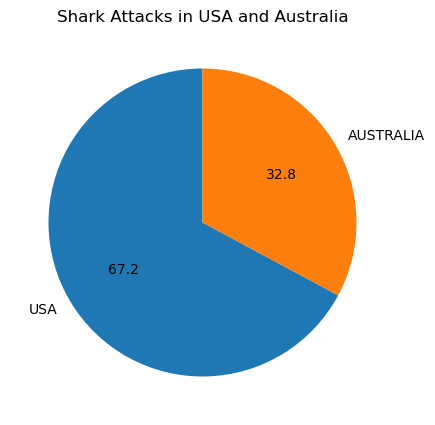

In [24]:
#Make a pie chart with the number of incidents in each country

australia_sum = grouped_location["AUSTRALIA"].sum()
usa_sum = grouped_location["USA"].sum()

#labels for the sections
labels = ['USA', 'AUSTRALIA']

#values for the sections
sizes = [usa_sum, australia_sum]

plt.figure(figsize=(10, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f', startangle=90)
plt.title('Shark Attacks in USA and Australia')
plt.show()

In [25]:
df.Country.value_counts()

Country
USA                 508
AUSTRALIA           248
BAHAMAS              43
SOUTH AFRICA         43
BRAZIL               21
                   ... 
PORTUGAL              1
TURKS and CaICOS      1
South Africa          1
Maldives              1
ATLANTIC OCEAN        1
Name: count, Length: 66, dtype: int64

In [26]:
#Only consider incidents in USA

df_usa = df.loc[df['Country'] == 'USA']

df_usa.head()

,Date,Year,Country,Location,Injury,Species,Activity
1,04 Mar 2024,2024,USA,"Old Man's, Waikiki",Injured,Tiger shark 8',Surfing
2,02 Mar-2024,2024,USA,"Rainbows, Oahu",Lacerations,3' to 4' shark,Swimming
10,30 Dec-2023,2023,USA,"Baby Beach, Maui",Fatal,NaN,Surfing
24,05 Nov-2023,2023,USA,"Juno Beach, Palm Beach County",Lacerations,NaN,Swimming
29,25 Oct 2023,2023,USA,"Pua’ena Point, Haleiwa, Oahu",Bitten,8' tiger shark,Surfing


In [27]:
df_usa.Species.value_counts().head(10)

Species
White shark                        18
Shark involvement not confirmed    12
Tiger shark                        10
4' shark                            9
Bull shark                          7
4' to 5' shark                      6
3' to 4' shark                      6
Blacktip shark                      5
8' shark                            5
5' shark                            5
Name: count, dtype: int64

In [28]:
#Formating the date column

# The first lambda function removes all whitespaces, commas, and hyphens from the date | Using regex -
df_usa['Date'] = df_usa['Date'].apply(lambda x: re.sub(r'[-\s,]', '', str(x)))

# The second lambda function adds a hyphen after the first four digits
df_usa['Date'] = df_usa['Date'].apply(lambda x: re.sub(r'(\d{4})', r'\1-', str(x)))

# The third lambda function converts the month into a numerical value
df_usa['Date'] = pd.to_datetime(df_usa['Date'], errors='coerce') 

# The fourth lambda function formats the date to 'dd-mm-yy' | Also here the date is converted to a string(object) in order to apply the strftime method.
df_usa['Date'] = df_usa['Date'].dt.strftime('%d-%m-%y')

# Convert the 'Date' column back to datetime format
df_usa['Date'] = pd.to_datetime(df_usa['Date'], format='%d-%m-%y', errors='coerce')


df_usa.head()

/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_85950/3495760514.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa['Date'] = df_usa['Date'].apply(lambda x: re.sub(r'[-\s,]', '', str(x)))
/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_85950/3495760514.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa['Date'] = df_usa['Date'].apply(lambda x: re.sub(r'(\d{4})', r'\1-', str(x)))
/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_85950/3495760514.py:12: SettingWit

,Date,Year,Country,Location,Injury,Species,Activity
1,2024-03-04,2024,USA,"Old Man's, Waikiki",Injured,Tiger shark 8',Surfing
2,2024-03-02,2024,USA,"Rainbows, Oahu",Lacerations,3' to 4' shark,Swimming
10,2023-12-30,2023,USA,"Baby Beach, Maui",Fatal,NaN,Surfing
24,2023-11-05,2023,USA,"Juno Beach, Palm Beach County",Lacerations,NaN,Swimming
29,2023-10-25,2023,USA,"Pua’ena Point, Haleiwa, Oahu",Bitten,8' tiger shark,Surfing


In [30]:
df_usa.Date

1      2024-03-04
2      2024-03-02
10     2023-12-30
24     2023-11-05
29     2023-10-25
          ...    
1056   2015-03-18
1067   2015-01-27
1070   2015-01-19
1074   2015-01-08
1077   2015-01-01
Name: Date, Length: 508, dtype: datetime64[ns]

In [31]:

def get_season(Date):
    if pd.isna(Date):
        return 'Unknown'
    month = pd.to_datetime(Date).month #Convert Date to datetime object and extract the month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

df_usa['Season'] = df_usa['Date'].apply(get_season)

df_usa.head()

/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_85950/2831358254.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa['Season'] = df_usa['Date'].apply(get_season)


,Date,Year,Country,Location,Injury,Species,Activity,Season
1,2024-03-04,2024,USA,"Old Man's, Waikiki",Injured,Tiger shark 8',Surfing,Spring
2,2024-03-02,2024,USA,"Rainbows, Oahu",Lacerations,3' to 4' shark,Swimming,Spring
10,2023-12-30,2023,USA,"Baby Beach, Maui",Fatal,NaN,Surfing,Winter
24,2023-11-05,2023,USA,"Juno Beach, Palm Beach County",Lacerations,NaN,Swimming,Fall
29,2023-10-25,2023,USA,"Pua’ena Point, Haleiwa, Oahu",Bitten,8' tiger shark,Surfing,Fall


In [32]:
df_usa["Date"].loc[df_usa.Season ==  "Unknown"]

72    NaT
384   NaT
456   NaT
597   NaT
895   NaT
Name: Date, dtype: datetime64[ns]

In [49]:
#Grouping by 'Season' and 'Year' and counting the occurrences

grouped_season = df_usa.groupby(['Season', 'Year']).size().unstack(fill_value=0)

#We had a last column where we summed all the occurrences of shark attacks in the USA

grouped_season['Total sum'] = grouped_season.sum(axis=1)

#The error= 'coerce' found 5 date formats that were not converted correctly, so they will show as "Unknown" in the 'Season' column, and will not be considered in the analysis.

grouped_season = grouped_season.drop('Unknown')

grouped_season

Year,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total sum
Season,,,,,,,,,,,
Fall,29,17,18,13,11,14,6,12,11,0,131
Spring,11,17,19,8,16,7,14,9,13,2,116
Summer,28,24,22,21,25,22,25,24,16,0,207
Winter,5,6,7,0,6,5,9,7,4,0,49


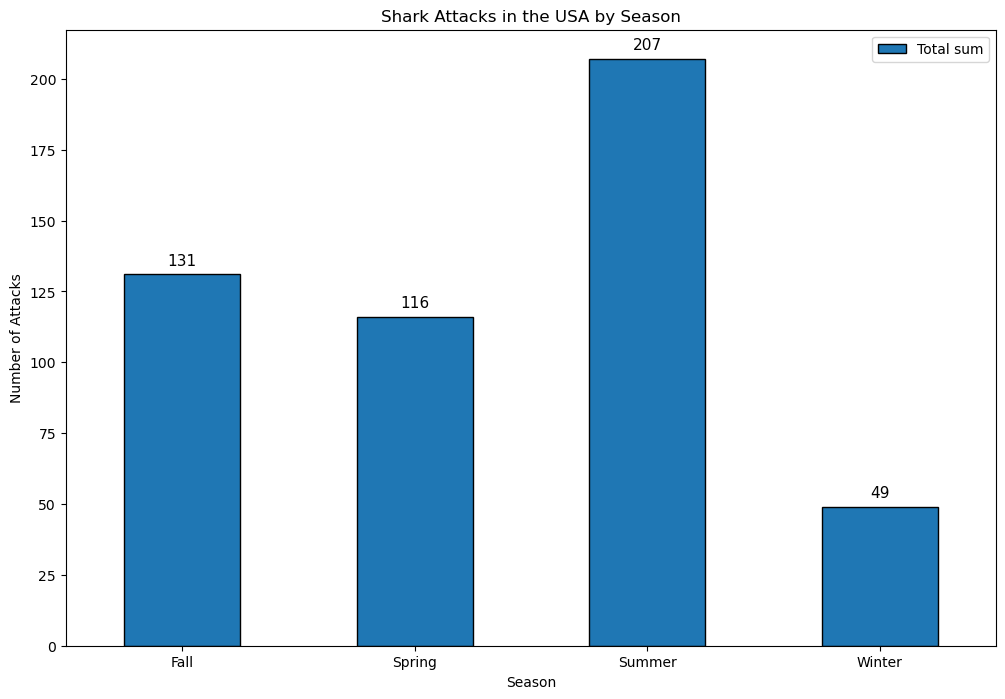

In [105]:

# Plotting the stacked bar chart using just the Season and total columns, and show the number on top of each bar

#Color blue ocean shades

blues_hades = ['#1f77b4', '#66b3ff', '#3399ff', '#1a75ff']

# Create the bar plot

ax = grouped_season[['Total sum']].plot(kind='bar', stacked=True, figsize=(12, 8), color=blues_hades, edgecolor='black')

# Add values for each season on top of each bar

"""
The for loop iterates over each bar in the plot.

f'{p.get_height()}': The height value is formatted as a string using an f-string.
p.get_x() + p.get_width() / 2.: The x-coordinate is calculated by adding the x-coordinate of the bar and half of its width.
p.get_height(): The y-coordinate is the height of the bar.
ha='center': The horizontal alignment is set to center.
va='center': The vertical alignment is set to center.
xytext=(0, 10): The text is placed 5 points above the bar.
textcoords='offset points': The text is offset by points.
fontsize=12: The font size is set to 12.

"""

for p in ax.patches: #Patches in matplotlib are the objects that we can see in the plot, like bars, lines, etc.
    ax.annotate(f'{int(p.get_height())}', 
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', 
            va='center', 
            xytext=(0, 10), 
            textcoords='offset points', 
            fontsize=11, 
            color='black')


# Set plot title and labels
plt.title('Shark Attacks in the USA by Season')
plt.ylabel('Number of Attacks')
plt.xlabel('Season')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()



In [ ]:
#Standardize the species names

df_usa['Species'] = df_usa['Species'].apply(lambda x: "White Shark" if "white shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Tiger Shark" if "tiger shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Bull Shark" if "bull shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Nurse Shark" if "nurse shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Blacktip Shark" if "blacktip shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Hammerhead Shark" if "hammerhead shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Mako Shark" if "mako shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Lemon Shark" if "lemon shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Blue Shark" if "blue shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Spinner Shark" if "spinner shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Sand Tiger Shark" if "sand tiger shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Dusky Shark" if "dusky shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Caribbean Reef Shark" if "caribbean reef shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Galapagos Shark" if "galapagos shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Zambesi Shark" if "zambesi shark" in str(x).lower() else x)

df_usa.Species.value_counts().head(10)

/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_84814/3898354142.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa['Species'] = df_usa['Species'].apply(lambda x: "White Shark" if "white shark" in str(x).lower() else x)
/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_84814/3898354142.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa['Species'] = df_usa['Species'].apply(lambda x: "Tiger Shark" if "tiger shark" in str(x).lower() else x)
/var/folders/9x/21kgbkbn0gx6fdwpv8

Species
White Shark                        42
Tiger Shark                        40
Bull Shark                         26
Blacktip Shark                     21
Shark involvement not confirmed    12
Spinner Shark                      11
Nurse Shark                        11
4' shark                            9
3' to 4' shark                      6
4' to 5' shark                      6
Name: count, dtype: int64

In [ ]:
df_usa.head()

,Date,Year,Country,Location,Injury,Species,Activity,Season
1,2024-03-04,2024,USA,"Old Man's, Waikiki",Injured,Tiger Shark,Surfing,Spring
2,2024-03-02,2024,USA,"Rainbows, Oahu",Lacerations,3' to 4' shark,Swimming,Spring
10,2023-12-30,2023,USA,"Baby Beach, Maui",Fatal,NaN,Surfing,Winter
24,2023-11-05,2023,USA,"Juno Beach, Palm Beach County",Lacerations,NaN,Swimming,Fall
29,2023-10-25,2023,USA,"Pua’ena Point, Haleiwa, Oahu",Bitten,Tiger Shark,Surfing,Fall


In [ ]:
df_usa.Species.fillna("Not Specified", inplace=True)

df_usa.Species.value_counts().head(10)

df_usa.Species.isnull().sum()

/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_84814/1814779284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa.Species.fillna("Not Specified", inplace=True)


0